In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 한글 깨짐 방지 
plt.rcParams['font.family'] = 'NanumGothic' 

C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
'''
다 함께 하는 작업 공간이기 때문에 경로나 파일 명 등을 통일 해야 할 것 같습니다.
그렇게 하지 않으면 경로 때문에 매번 새로운 커밋이 생성 됩니다.
'''



# 현재 작업 디렉토리 확인
current_directory = os.getcwd()
print("Current directory:", current_directory)

# 필요한 CSV 파일이 있는 디렉토리로 변경
target_directory = "C:/k-project/raw_datasets/국가" # 해당 코드 부분의 경로를 동일하게 하거나 / 깃 리파지토리 안에 파일을 집어 넣는 작업 필요.      
os.chdir(target_directory)

# CSV 파일 불러오기
csv_filename = "World_Data.csv"  # CSV 파일명. 파일명을 모두 동일하게 해야합니다.
df = pd.read_csv(csv_filename)


df.head()

Current directory: c:\k-project\source\model


,COUNTRY,Composite_Indicators,1980,1981,1982,1983,1984,1985,1986,1987,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,World,Biomass and waste (billion kWh),17.725897,17.888914,27.192153,28.180857,31.165802,31.652510,34.259224,38.151013,...,407.145946,445.637929,479.654452,507.591876,547.176101,582.604904,601.204395,632.151593,637.505170,639.969020
1,World,CO2 emissions (MMtonnes CO2),18719.162260,18345.182640,18298.316560,18486.865270,19614.015520,20038.501420,20520.667340,21169.271870,...,34397.052190,34819.965440,34869.288780,34810.520970,34630.111770,35003.044820,35617.664270,35655.030690,33679.788650,35462.724110
2,World,Coal (quad Btu),78.694561,79.018341,80.468585,82.629641,86.399083,89.446988,90.460451,94.053384,...,171.364294,173.359051,172.359968,167.544280,163.234002,164.109245,165.807331,164.191431,158.756977,166.720467
3,World,Coal and coke (MMtonnes CO2),7491.618150,7518.337871,7651.370707,7855.808639,8212.132553,8503.411904,8601.810772,8936.353445,...,16274.362940,16460.029080,16363.966380,15989.432980,15580.290520,15628.001810,15827.466740,15741.552020,15251.920780,15966.057330
4,World,Consumed natural gas (MMtonnes CO2),2842.337165,2843.874298,2854.973114,2913.476944,3214.469613,3349.517700,3395.116049,3571.676242,...,6662.056920,6759.120316,6783.647503,6883.268117,7023.602021,7241.122517,7601.449578,7726.427466,7577.037734,7948.649507


In [3]:
df['Composite_Indicators'].unique()

array(['Biomass and waste (billion kWh)', 'CO2 emissions (MMtonnes CO2)',
       'Coal (quad Btu)', 'Coal and coke (MMtonnes CO2)',
       'Consumed natural gas (MMtonnes CO2)', 'Consumption (quad Btu)',
       'Fossil fuels (billion kWh)', 'GDP', 'Generation (billion kWh)',
       'Geothermal (billion kWh)',
       'Hydroelectric pumped storage (billion kWh)',
       'Hydroelectricity (billion kWh)', 'Natural gas (quad Btu)',
       'Non-hydroelectric renewables (billion kWh)',
       'Nuclear (billion kWh)', 'Nuclear (quad Btu)',
       'Nuclear, renewables, and other (quad Btu)',
       'Petroleum and other liquids (MMtonnes CO2)',
       'Petroleum and other liquids (quad Btu)', 'Population',
       'Renewables (billion kWh)', 'Renewables and other (quad Btu)',
       'Solar (billion kWh)',
       'Solar, tide, wave, fuel cell (billion kWh)',
       'Tide and wave (billion kWh)', 'Wind (billion kWh)'], dtype=object)

In [4]:
seq = df[df['Composite_Indicators'].values == 'CO2 emissions (MMtonnes CO2)']


In [5]:
seq.columns

Index(['COUNTRY', 'Composite_Indicators', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021'],
      dtype='object')

In [6]:
seq = seq.drop(['Composite_Indicators', 'COUNTRY'], axis=1)
seq

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,18719.16226,18345.18264,18298.31656,18486.86527,19614.01552,20038.50142,20520.66734,21169.27187,21846.14316,22164.92996,...,34397.05219,34819.96544,34869.28878,34810.52097,34630.11177,35003.04482,35617.66427,35655.03069,33679.78865,35462.72411


In [7]:
seq = seq.T
seq 

,1
1980,18719.16226
1981,18345.18264
1982,18298.31656
1983,18486.86527
1984,19614.01552
1985,20038.50142
1986,20520.66734
1987,21169.27187
1988,21846.14316
1989,22164.92996


In [8]:
seq.columns

Int64Index([1], dtype='int64')

In [9]:
seq.columns = ['CO2_emissions']
seq

,CO2_emissions
1980,18719.16226
1981,18345.18264
1982,18298.31656
1983,18486.86527
1984,19614.01552
1985,20038.50142
1986,20520.66734
1987,21169.27187
1988,21846.14316
1989,22164.92996


In [10]:
# 시퀀스 분할 함수 정의
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequences)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequences):
            break
        
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps_in, n_steps_out = 3, 1
X, y = split_sequences(seq, n_steps_in, n_steps_out)

In [11]:
print(X)

[[[18719.16226]
  [18345.18264]
  [18298.31656]]

 [[18345.18264]
  [18298.31656]
  [18486.86527]]

 [[18298.31656]
  [18486.86527]
  [19614.01552]]

 [[18486.86527]
  [19614.01552]
  [20038.50142]]

 [[19614.01552]
  [20038.50142]
  [20520.66734]]

 [[20038.50142]
  [20520.66734]
  [21169.27187]]

 [[20520.66734]
  [21169.27187]
  [21846.14316]]

 [[21169.27187]
  [21846.14316]
  [22164.92996]]

 [[21846.14316]
  [22164.92996]
  [22145.41295]]

 [[22164.92996]
  [22145.41295]
  [21970.53907]]

 [[22145.41295]
  [21970.53907]
  [21756.10964]]

 [[21970.53907]
  [21756.10964]
  [21883.66645]]

 [[21756.10964]
  [21883.66645]
  [22052.3184 ]]

 [[21883.66645]
  [22052.3184 ]
  [22542.116  ]]

 [[22052.3184 ]
  [22542.116  ]
  [23034.64935]]

 [[22542.116  ]
  [23034.64935]
  [23103.44865]]

 [[23034.64935]
  [23103.44865]
  [23150.37062]]

 [[23103.44865]
  [23150.37062]
  [23492.72702]]

 [[23150.37062]
  [23492.72702]
  [24249.34033]]

 [[23492.72702]
  [24249.34033]
  [24460.77055]]



In [12]:
print(y)

[[[18486.86527]]

 [[19614.01552]]

 [[20038.50142]]

 [[20520.66734]]

 [[21169.27187]]

 [[21846.14316]]

 [[22164.92996]]

 [[22145.41295]]

 [[21970.53907]]

 [[21756.10964]]

 [[21883.66645]]

 [[22052.3184 ]]

 [[22542.116  ]]

 [[23034.64935]]

 [[23103.44865]]

 [[23150.37062]]

 [[23492.72702]]

 [[24249.34033]]

 [[24460.77055]]

 [[25004.8652 ]]

 [[26148.25371]]

 [[27588.74155]]

 [[28674.60336]]

 [[29620.55968]]

 [[30070.39408]]

 [[30778.78774]]

 [[30600.03669]]

 [[32501.91555]]

 [[33612.62686]]

 [[34397.05219]]

 [[34819.96544]]

 [[34869.28878]]

 [[34810.52097]]

 [[34630.11177]]

 [[35003.04482]]

 [[35617.66427]]

 [[35655.03069]]

 [[33679.78865]]

 [[35462.72411]]]


In [13]:
# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=y[0:split]
x_test=X[split:]; y_test=y[split:]

In [14]:
# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))


# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):", sum(abs(y_test-pred)/y_test)/len(x_test))

Epoch 1/200
27/27 - 1s - loss: 19056.4258 - mae: 19056.4258 - val_loss: 22216.8730 - val_mae: 22216.8730 - 1s/epoch - 42ms/step
Epoch 2/200
27/27 - 0s - loss: 9178.8564 - mae: 9178.8564 - val_loss: 1234.2391 - val_mae: 1234.2391 - 82ms/epoch - 3ms/step
Epoch 3/200
27/27 - 0s - loss: 788.1714 - mae: 788.1714 - val_loss: 988.2991 - val_mae: 988.2991 - 80ms/epoch - 3ms/step
Epoch 4/200
27/27 - 0s - loss: 845.6788 - mae: 845.6788 - val_loss: 1310.4003 - val_mae: 1310.4003 - 81ms/epoch - 3ms/step
Epoch 5/200
27/27 - 0s - loss: 785.0130 - mae: 785.0130 - val_loss: 1219.2721 - val_mae: 1219.2721 - 80ms/epoch - 3ms/step
Epoch 6/200
27/27 - 0s - loss: 743.2470 - mae: 743.2470 - val_loss: 1044.8536 - val_mae: 1044.8536 - 76ms/epoch - 3ms/step
Epoch 7/200
27/27 - 0s - loss: 641.3914 - mae: 641.3914 - val_loss: 1509.3041 - val_mae: 1509.3041 - 79ms/epoch - 3ms/step
Epoch 8/200
27/27 - 0s - loss: 583.4438 - mae: 583.4438 - val_loss: 1520.0695 - val_mae: 1520.0695 - 80ms/epoch - 3ms/step
Epoch 9/200

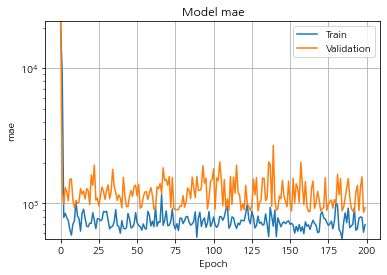

In [19]:
import matplotlib.pyplot as plt

# 이전에 주어진 코드가 여기서 hist 변수에 할당되었다고 가정하고 계속 진행합니다.

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')

# val_mae의 범위를 mae와 유사하게 설정
plt.ylim([min(min(hist.history['mae']), min(hist.history['val_mae'])), max(max(hist.history['mae']), max(hist.history['val_mae']))])

plt.yscale('log')  # 로그 스케일링을 사용하여 값의 차이를 줄임
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()


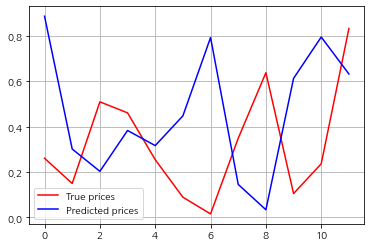

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# pred가 3차원 배열일 경우 예시 데이터로 대체
y_test = np.random.rand(12)
pred = np.random.rand(12, 1, 1)  # 3D array일 때의 예시

x_range = range(len(y_test))
plt.plot(x_range, y_test, color='red')
plt.plot(x_range, pred.reshape(-1), color='blue')  # pred를 1D 배열로 변환
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()


In [ ]:
# # 예측 및 결과 평가
# y_pred = model.predict(X_test)

########################################################

In [ ]:
'''
다 함께 하는 작업 공간이기 때문에 경로나 파일 명 등을 통일 해야 할 것 같습니다.
그렇게 하지 않으면 경로 때문에 매번 새로운 커밋이 생성 됩니다.
'''



# 현재 작업 디렉토리 확인
current_directory = os.getcwd()
print("Current directory:", current_directory)

# 필요한 CSV 파일이 있는 디렉토리로 변경
target_directory = "C:/k-project/raw_datasets/국가" # 해당 코드 부분의 경로를 동일하게 하거나 / 깃 리파지토리 안에 파일을 집어 넣는 작업 필요.      
os.chdir(target_directory)

# CSV 파일 불러오기
csv_filename = "World_Data.csv"  # CSV 파일명. 파일명을 모두 동일하게 해야합니다.
df = pd.read_csv(csv_filename)


df.head()

Current directory: C:\k-project\raw_datasets\국가


,COUNTRY,Composite_Indicators,1980,1981,1982,1983,1984,1985,1986,1987,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,World,Biomass and waste (billion kWh),17.725897,17.888914,27.192153,28.180857,31.165802,31.652510,34.259224,38.151013,...,407.145946,445.637929,479.654452,507.591876,547.176101,582.604904,601.204395,632.151593,637.505170,639.969020
1,World,CO2 emissions (MMtonnes CO2),18719.162260,18345.182640,18298.316560,18486.865270,19614.015520,20038.501420,20520.667340,21169.271870,...,34397.052190,34819.965440,34869.288780,34810.520970,34630.111770,35003.044820,35617.664270,35655.030690,33679.788650,35462.724110
2,World,Coal (quad Btu),78.694561,79.018341,80.468585,82.629641,86.399083,89.446988,90.460451,94.053384,...,171.364294,173.359051,172.359968,167.544280,163.234002,164.109245,165.807331,164.191431,158.756977,166.720467
3,World,Coal and coke (MMtonnes CO2),7491.618150,7518.337871,7651.370707,7855.808639,8212.132553,8503.411904,8601.810772,8936.353445,...,16274.362940,16460.029080,16363.966380,15989.432980,15580.290520,15628.001810,15827.466740,15741.552020,15251.920780,15966.057330
4,World,Consumed natural gas (MMtonnes CO2),2842.337165,2843.874298,2854.973114,2913.476944,3214.469613,3349.517700,3395.116049,3571.676242,...,6662.056920,6759.120316,6783.647503,6883.268117,7023.602021,7241.122517,7601.449578,7726.427466,7577.037734,7948.649507


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
# from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# # co2배출량과 호주 데이터만 선택

# # 데이터 전처리
# scaler = MinMaxScaler(feature_range=(0,1))
# df_co2_scaled = scaler.fit_transform(df_co2)

In [ ]:


# 트레이닝셋, 테스트셋 분리
train_size = int(len(df_co2) * 0.7)
train, test = df_co2[0:train_size, :], df_co2[train_size:len(df_co2), :]

# X, Y 데이터셋 생성
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# 2022년 예측
last_val = df_co2[-1]
last_val_scaled = last_val.reshape(-1, 1)
next_val = model.predict(last_val_scaled)
print("2022년의 CO2 배출량 예측값: ", next_val)


TypeError: '(slice(0, 29, None), slice(None, None, None))' is an invalid key

In [ ]:
# 데이터 선택
df_co2 = df[(df['Composite_Indicators'] == 'CO2 emissions (MMtonnes CO2)') & (df['COUNTRY'] == 'Australia')].drop(columns=['Composite_Indicators', 'COUNTRY']).transpose()
df_co2.columns = ['CO2_emissions']

df_biomass = df[(df['Composite_Indicators'] == 'Biomass and waste (billion kWh)') & (df['COUNTRY'] == 'Australia')].drop(columns=['Composite_Indicators', 'COUNTRY']).transpose()
df_biomass.columns = ['Biomass_waste']

df_combined = df_co2.join(df_biomass)

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0,1))
df_combined_scaled = scaler.fit_transform(df_combined)
df_combined

,CO2_emissions,Biomass_waste
1980,221.314466,0.400
1981,223.053852,0.400
1982,230.129715,0.500
1983,219.685227,0.400
1984,227.994782,0.400
1985,240.581272,0.400
1986,241.444382,0.400
1987,259.333455,0.400
1988,262.533088,0.700
1989,280.535254,0.800


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 데이터 선택
df_co2 = df[(df['Composite_Indicators'] == 'CO2 emissions (MMtonnes CO2)') & (df['COUNTRY'] == 'Australia')].drop(columns=['Composite_Indicators', 'COUNTRY']).transpose()
df_co2.columns = ['CO2_emissions']

df_biomass = df[(df['Composite_Indicators'] == 'Biomass and waste (billion kWh)') & (df['COUNTRY'] == 'Australia')].drop(columns=['Composite_Indicators', 'COUNTRY']).transpose()
df_biomass.columns = ['Biomass_waste']

df_coal = df[(df['Composite_Indicators'] == 'Coal (quad Btu)') & (df['COUNTRY'] == 'Australia')].drop(columns=['Composite_Indicators', 'COUNTRY']).transpose()
df_coal.columns = ['Coal']

df_coal_coke = df[(df['Composite_Indicators'] == 'Coal and coke (MMtonnes CO2)') & (df['COUNTRY'] == 'Australia')].drop(columns=['Composite_Indicators', 'COUNTRY']).transpose()
df_coal_coke.columns = ['Coal and coke (MMtonnes CO2)']

df_natural_gas = df[(df['Composite_Indicators'] == 'Consumed natural gas (MMtonnes CO2)') & (df['COUNTRY'] == 'Australia')].drop(columns=['Composite_Indicators', 'COUNTRY']).transpose()
df_natural_gas.columns = ['Consumed natural gas (MMtonnes CO2)']

# 오브젝트 타입 수정 필요
df_consumption = df[(df['Composite_Indicators'] == 'Consumption (quad Btu)') & (df['COUNTRY'] == 'Australia')].drop(columns=['Composite_Indicators', 'COUNTRY']).transpose()
df_consumption.columns = ['Consumption (quad Btu)']

df_fuels = df[(df['Composite_Indicators'] == 'Fossil fuels (billion kWh)') & (df['COUNTRY'] == 'Australia')].drop(columns=['Composite_Indicators', 'COUNTRY']).transpose()
df_fuels.columns = ['Fossil fuels (billion kWh)']

df_GDP = df[(df['Composite_Indicators'] == 'GDP') & (df['COUNTRY'] == 'Australia')].drop(columns=['Composite_Indicators', 'COUNTRY']).transpose()
df_GDP.columns = ['GDP']


df_combined = df_co2.join(df_biomass).join(df_coal).join(df_coal_coke).join(df_natural_gas).join(df_consumption).join(df_fuels).join(df_GDP)


# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0,1))
df_combined_scaled = scaler.fit_transform(df_combined)

# 트레이닝셋, 테스트셋 분리
train_size = int(len(df_combined_scaled) * 0.7)
train, test = df_combined_scaled[0:train_size, :], df_combined_scaled[train_size:len(df_combined_scaled), :]

# X, Y 데이터셋 생성
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# 2022년 예측
last_val = df_combined_scaled[-1]
last_val_scaled = last_val.reshape(1, 1, -1)
next_val = model.predict(last_val_scaled)

# 스케일러 수정
co2_scaler = MinMaxScaler(feature_range=(0,1))
co2_scaler.min_, co2_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

print("2022년의 CO2 배출량 예측값: ", co2_scaler.inverse_transform(next_val))

Epoch 1/100
27/27 - 1s - loss: 0.2095 - 1s/epoch - 51ms/step
Epoch 2/100
27/27 - 0s - loss: 0.1480 - 33ms/epoch - 1ms/step
Epoch 3/100
27/27 - 0s - loss: 0.0998 - 33ms/epoch - 1ms/step
Epoch 4/100
27/27 - 0s - loss: 0.0631 - 33ms/epoch - 1ms/step
Epoch 5/100
27/27 - 0s - loss: 0.0392 - 33ms/epoch - 1ms/step
Epoch 6/100
27/27 - 0s - loss: 0.0236 - 34ms/epoch - 1ms/step
Epoch 7/100
27/27 - 0s - loss: 0.0151 - 32ms/epoch - 1ms/step
Epoch 8/100
27/27 - 0s - loss: 0.0106 - 36ms/epoch - 1ms/step
Epoch 9/100
27/27 - 0s - loss: 0.0087 - 33ms/epoch - 1ms/step
Epoch 10/100
27/27 - 0s - loss: 0.0077 - 33ms/epoch - 1ms/step
Epoch 11/100
27/27 - 0s - loss: 0.0070 - 33ms/epoch - 1ms/step
Epoch 12/100
27/27 - 0s - loss: 0.0066 - 32ms/epoch - 1ms/step
Epoch 13/100
27/27 - 0s - loss: 0.0061 - 33ms/epoch - 1ms/step
Epoch 14/100
27/27 - 0s - loss: 0.0057 - 33ms/epoch - 1ms/step
Epoch 15/100
27/27 - 0s - loss: 0.0053 - 32ms/epoch - 1ms/step
Epoch 16/100
27/27 - 0s - loss: 0.0049 - 32ms/epoch - 1ms/step
Ep